# Agregacion de datos por categoria 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
gender = ["Male","Female"]
income = ["Poor","Middle Class","Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    
gender_data[:10]
#income_data[:10]

['Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male']

In [4]:
height = 160 + 30 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
income = 1800 + 3500 * np.random.randn(n)

In [5]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Social Economic": income_data,
        "Height":height,
        "Weight": weight,
        "Age": age,
        "Income":income
    }
)

In [6]:
data.head()

,Gender,Social Economic,Height,Weight,Age,Income
0,Male,Middle Class,182.530356,45.268646,7.867843,1048.036668
1,Male,Middle Class,120.885281,86.458922,44.010944,-724.094687
2,Female,Poor,194.323479,56.301084,28.256035,4958.630351
3,Female,Rich,153.473023,83.683735,21.280799,4178.745641
4,Male,Rich,199.742816,47.361290,27.525710,-5338.233147


## Agrupacion de datos


In [7]:
group_gender = data.groupby("Gender")

In [8]:
group_gender.groups

{'Female': Int64Index([  2,   3,   7,   8,  10,  18,  20,  22,  23,  24,
             ...
             479, 480, 482, 483, 485, 486, 488, 489, 497, 498],
            dtype='int64', length=249),
 'Male': Int64Index([  0,   1,   4,   5,   6,   9,  11,  12,  13,  14,
             ...
             484, 487, 490, 491, 492, 493, 494, 495, 496, 499],
            dtype='int64', length=251)}

In [9]:
for names, groups in group_gender:
    print(names)
    print(groups)

Female
     Gender Social Economic      Height     Weight        Age       Income
2    Female            Poor  194.323479  56.301084  28.256035  4958.630351
3    Female            Rich  153.473023  83.683735  21.280799  4178.745641
7    Female    Middle Class  148.211589  51.476673  11.046725  4337.207076
8    Female            Rich  171.604834  44.609277  22.741490  2345.300669
10   Female            Poor  128.783830  43.050880  39.524694  3955.265683
..      ...             ...         ...        ...        ...          ...
486  Female            Rich  135.620045  66.310563  45.702468  4854.086402
488  Female    Middle Class  107.038312  47.490262  40.538769   512.185887
489  Female            Rich  132.879952  90.604792  39.316913  5748.902158
497  Female    Middle Class  169.217172  46.551295  12.434485  4139.931835
498  Female            Rich  135.360234  93.778017  35.790728  2892.978354

[249 rows x 6 columns]
Male
    Gender Social Economic      Height      Weight        Age   

In [10]:
group_gender.get_group("Male")

,Gender,Social Economic,Height,Weight,Age,Income
0,Male,Middle Class,182.530356,45.268646,7.867843,1048.036668
1,Male,Middle Class,120.885281,86.458922,44.010944,-724.094687
4,Male,Rich,199.742816,47.361290,27.525710,-5338.233147
5,Male,Middle Class,148.383424,102.784254,40.211544,5419.082475
6,Male,Poor,159.367677,71.941210,17.540322,3699.355089
...,...,...,...,...,...,...
493,Male,Middle Class,186.420670,93.060443,46.221863,5363.620545
494,Male,Rich,201.288355,88.167492,52.753053,3071.812740
495,Male,Middle Class,202.571984,68.908943,39.788876,-3579.898303
496,Male,Rich,153.693438,73.759690,36.164624,-1737.535888


In [11]:
double_group = data.groupby(["Gender","Social Economic"])

In [12]:
len(double_group)

6

In [13]:
for names, grups in double_group:
    print(names)
    print(grups)

('Female', 'Middle Class')
     Gender Social Economic      Height      Weight        Age       Income
7    Female    Middle Class  148.211589   51.476673  11.046725  4337.207076
20   Female    Middle Class  141.048141   71.906742  43.890862  4146.478692
22   Female    Middle Class  162.019641  108.840288  42.026546  6283.903262
24   Female    Middle Class  117.264660   64.970184  24.280048  1882.028630
25   Female    Middle Class  162.292185   71.155341  25.017053  2607.051764
..      ...             ...         ...         ...        ...          ...
474  Female    Middle Class  157.080636   80.450725  33.719151 -1414.746711
477  Female    Middle Class  166.402427   77.815796  35.306786 -1481.685154
479  Female    Middle Class  180.718301   78.673691  29.318271  -897.971813
488  Female    Middle Class  107.038312   47.490262  40.538769   512.185887
497  Female    Middle Class  169.217172   46.551295  12.434485  4139.931835

[84 rows x 6 columns]
('Female', 'Poor')
     Gender Social 

## Operaciones sobre datos agrupados

In [14]:
double_group.sum()

Height       Weight          Age         Income
Gender Social Economic                                                       
Female Middle Class     13070.704046  5737.963582  2386.690542  135225.746760
       Poor             14194.100793  5665.457740  2672.527921  170984.347376
       Rich             12049.487681  5050.118330  2457.106270  143372.737033
Male   Middle Class     13952.799231  5931.603208  2629.192216  162020.861691
       Poor             14252.643842  5944.104421  2635.769639  119411.649267
       Rich             11846.234832  4752.086944  2336.550238  125674.618040

In [15]:
double_group.mean()

Height     Weight        Age       Income
Gender Social Economic                                               
Female Middle Class     155.603620  68.309090  28.412983  1609.830319
       Poor             161.296600  64.380202  30.369635  1943.003947
       Rich             156.486853  65.585952  31.910471  1861.983598
Male   Middle Class     162.241852  68.972130  30.572003  1883.963508
       Poor             158.362709  66.045605  29.286329  1326.796103
       Rich             157.949798  63.361159  31.154003  1675.661574

In [16]:
double_group.size()

Gender  Social Economic
Female  Middle Class       84
        Poor               88
        Rich               77
Male    Middle Class       86
        Poor               90
        Rich               75
dtype: int64

In [17]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Social Economic                                                        
Female Middle Class      84.0  155.603620  29.943620  62.416210  140.684905   
       Poor              88.0  161.296600  32.264219  81.886246  136.407837   
       Rich              77.0  156.486853  29.660734  90.010457  135.620045   
Male   Middle Class      86.0  162.241852  30.154661  85.543854  148.188255   
       Poor              90.0  158.362709  27.600251  95.613345  140.402938   
       Rich              75.0  157.949798  27.865194  98.760858  137.926357   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Social Economic                                                         
Female Middle Class     155.087939  171.857381  246.615219   84.0  68.309090   
       Poor             159.013330  184.834754  234.186911   88.0  64.380202   
       Rich             154.317843  178.719131  232.356263   77.0  65.585952   
Male   Middle Class     165.019865  182.406388  242.466062   86.0  68.972130   
       Poor             158.385741  175.101480  221.060877   90.0  66.045605   
       Rich             156.239285  177.303134  220.536081   75.0  63.361159   

                        ...        Age            Income               \
                        ...        75%        max  count         mean   
Gender Social Economic  ...                                             
Female Middle Class     ...  35.604127  59.696911   84.0  1609.830319   
       Poor             ...  38.101427  58.073753   88.0  1943.003947   
       Rich             ...  41.078200  52.835861   77.0  1861.983598   
Male   Middle Class     ...  42.344003  57.454206   86.0  1883.963508   
       Poor             ...  38.381721  59.915933   90.0  1326.796103   
       Rich             ...  38.535702  62.013496   75.0  1675.661574   

                                                                           \
                                std          min         25%          50%   
Gender Social Economic                                                      
Female Middle Class     3344.034835 -6557.513859 -881.057239  1329.869075   
       Poor             3829.150687 -9144.711627 -232.629833  1872.442914   
       Rich             3245.957609 -8216.109901 -309.816241  2080.917749   
Male   Middle Class     3726.416575 -5881.659784 -618.182347  2466.488084   
       Poor             3462.158133 -7815.278501 -793.783873  1363.018075   
       Rich             3669.666216 -5415.139257 -988.082781  1690.546600   

                                                   
                                75%           max  
Gender Social Economic                             
Female Middle Class     3719.831754   8585.188303  
       Poor             4628.387450   9577.835450  
       Rich             4178.745641   8437.457293  
Male   Middle Class     4416.039125   9393.051368  
       Poor             3769.046637   8833.216755  
       Rich             4039.774289  10449.821453  

[6 rows x 32 columns]

In [18]:
grouped_income = double_group["Income"]

In [19]:
grouped_income.describe()

count         mean          std          min  \
Gender Social Economic                                                 
Female Middle Class      84.0  1609.830319  3344.034835 -6557.513859   
       Poor              88.0  1943.003947  3829.150687 -9144.711627   
       Rich              77.0  1861.983598  3245.957609 -8216.109901   
Male   Middle Class      86.0  1883.963508  3726.416575 -5881.659784   
       Poor              90.0  1326.796103  3462.158133 -7815.278501   
       Rich              75.0  1675.661574  3669.666216 -5415.139257   

                               25%          50%          75%           max  
Gender Social Economic                                                      
Female Middle Class    -881.057239  1329.869075  3719.831754   8585.188303  
       Poor            -232.629833  1872.442914  4628.387450   9577.835450  
       Rich            -309.816241  2080.917749  4178.745641   8437.457293  
Male   Middle Class    -618.182347  2466.488084  4416.039125   9393.051368  
       Poor            -793.783873  1363.018075  3769.046637   8833.216755  
       Rich            -988.082781  1690.546600  4039.774289  10449.821453

In [20]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age":np.mean,
        "Height":np.std
    }
)

Income        Age     Height
Gender Social Economic                                     
Female Middle Class     135225.746760  28.412983  29.943620
       Poor             170984.347376  30.369635  32.264219
       Rich             143372.737033  31.910471  29.660734
Male   Middle Class     162020.861691  30.572003  30.154661
       Poor             119411.649267  29.286329  27.600251
       Rich             125674.618040  31.154003  27.865194

In [21]:
double_group.aggregate(
    {
        "Age":np.mean,
        "Height": lambda h: (np.mean(h)/ np.std(h))
    }
)

Age    Height
Gender Social Economic                     
Female Middle Class     28.412983  5.227764
       Poor             30.369635  5.027890
       Rich             31.910471  5.310489
Male   Middle Class     30.572003  5.411881
       Poor             29.286329  5.769872
       Rich             31.154003  5.706526

In [22]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Social Economic                                                     
Female Middle Class     13070.704046  155.603620  29.943620  5737.963582   
       Poor             14194.100793  161.296600  32.264219  5665.457740   
       Rich             12049.487681  156.486853  29.660734  5050.118330   
Male   Middle Class     13952.799231  162.241852  30.154661  5931.603208   
       Poor             14252.643842  158.362709  27.600251  5944.104421   
       Rich             11846.234832  157.949798  27.865194  4752.086944   

                                                      Age             \
                             mean        std          sum       mean   
Gender Social Economic                                                 
Female Middle Class     68.309090  24.477171  2386.690542  28.412983   
       Poor             64.380202  24.089305  2672.527921  30.369635   
       Rich             65.585952  23.635600  2457.106270  31.910471   
Male   Middle Class     68.972130  24.619441  2629.192216  30.572003   
       Poor             66.045605  24.083437  2635.769639  29.286329   
       Rich             63.361159  23.529445  2336.550238  31.154003   

                                          Income                            
                              std            sum         mean          std  
Gender Social Economic                                                      
Female Middle Class     11.402861  135225.746760  1609.830319  3344.034835  
       Poor             11.316475  170984.347376  1943.003947  3829.150687  
       Rich             12.368467  143372.737033  1861.983598  3245.957609  
Male   Middle Class     12.451026  162020.861691  1883.963508  3726.416575  
       Poor             13.140147  119411.649267  1326.796103  3462.158133  
       Rich             12.026897  125674.618040  1675.661574  3669.666216

In [23]:
double_group.aggregate([lambda x: np.mean(x)/ np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Social Economic                                        
Female Middle Class     5.227764  2.807488  2.506707  0.484295
       Poor             5.027890  2.687879  2.699045  0.510332
       Rich             5.310489  2.793076  2.596904  0.577393
Male   Middle Class     5.411881  2.817962  2.469781  0.508535
       Poor             5.769872  2.757730  2.241254  0.385375
       Rich             5.706526  2.710979  2.607805  0.459700

## Filtrado de datos

In [24]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0       7.867843
1      44.010944
2      28.256035
3      21.280799
5      40.211544
         ...    
492    30.797247
493    46.221863
495    39.788876
498    35.790728
499    47.315850
Name: Age, Length: 341, dtype: float64

## Transformacion de variables

In [25]:
zscore = lambda x: (x-x.mean())/x.std()

In [26]:
z_group = double_group.transform(zscore)

(array([  5.,   9.,  42.,  79., 108.,  94.,  81.,  58.,  17.,   7.]),
 array([-2.90147679, -2.33697754, -1.77247829, -1.20797903, -0.64347978,
        -0.07898053,  0.48551872,  1.05001797,  1.61451722,  2.17901647,
         2.74351572]),
 <a list of 10 Patch objects>)

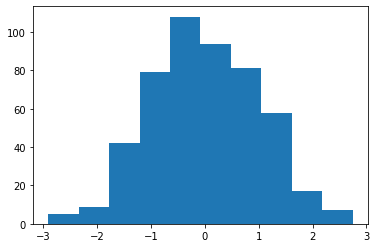

In [27]:
plt.hist(z_group["Age"])

In [28]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [29]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,182.530356,45.268646,7.867843,1048.036668
1,120.885281,86.458922,44.010944,-724.094687
2,194.323479,56.301084,28.256035,4958.630351
3,153.473023,83.683735,21.280799,4178.745641
4,199.742816,47.361290,27.525710,-5338.233147
...,...,...,...,...
495,202.571984,68.908943,39.788876,-3579.898303
496,153.693438,73.759690,36.164624,-1737.535888
497,169.217172,46.551295,12.434485,4139.931835
498,135.360234,93.778017,35.790728,2892.978354


### Operaciones diversas utiles

In [30]:
double_group.head(1)

,Gender,Social Economic,Height,Weight,Age,Income
0,Male,Middle Class,182.530356,45.268646,7.867843,1048.036668
2,Female,Poor,194.323479,56.301084,28.256035,4958.630351
3,Female,Rich,153.473023,83.683735,21.280799,4178.745641
4,Male,Rich,199.742816,47.361290,27.525710,-5338.233147
6,Male,Poor,159.367677,71.941210,17.540322,3699.355089
7,Female,Middle Class,148.211589,51.476673,11.046725,4337.207076


In [31]:
double_group.tail(1)

,Gender,Social Economic,Height,Weight,Age,Income
468,Female,Poor,108.547932,45.188723,42.890167,774.039850
492,Male,Poor,157.282110,82.253132,30.797247,5655.730626
496,Male,Rich,153.693438,73.759690,36.164624,-1737.535888
497,Female,Middle Class,169.217172,46.551295,12.434485,4139.931835
498,Female,Rich,135.360234,93.778017,35.790728,2892.978354
499,Male,Middle Class,205.049628,81.887014,47.315850,813.829656


In [32]:
double_group.nth(32)

Height      Weight        Age       Income
Gender Social Economic                                                
Female Middle Class     160.257979   38.492406  53.752996 -2001.745265
       Poor             157.803651   34.608345  54.675349  6474.485819
       Rich             169.508340  123.863690  34.031834  3957.791151
Male   Middle Class     115.011849  112.955082  20.089757  5288.054918
       Poor             192.310370   83.903170  28.510826  2494.547268
       Rich             112.114421   62.026746  37.392424  4212.580764

In [33]:
double_group.nth(82)

Height      Weight        Age       Income
Gender Social Economic                                                
Female Middle Class     107.038312   47.490262  40.538769   512.185887
       Poor             140.652023  108.522798  21.307532     9.351880
Male   Middle Class     178.242485   98.745359  18.290485  7093.588609
       Poor             163.727349   66.002539  21.132534   733.807676

In [34]:
data_sorted = data.sort_values(["Age","Income"])

In [35]:
data_sorted.head(10)

,Gender,Social Economic,Height,Weight,Age,Income
36,Male,Rich,156.517432,55.503819,-3.741759,4337.876556
234,Male,Poor,140.689304,83.062445,-2.156071,-1253.962373
328,Male,Poor,140.317605,89.065688,-1.538441,-1489.973059
310,Female,Rich,175.040001,81.959528,0.310326,4414.552414
82,Female,Poor,225.209425,25.116747,0.684593,-1071.469971
434,Female,Middle Class,143.164354,103.126605,1.883077,3579.798394
256,Male,Poor,203.328756,65.040709,2.441991,3831.991058
221,Female,Rich,100.439113,86.655852,3.188750,3078.595846
366,Male,Poor,142.655275,93.030947,3.749323,4837.913279
339,Female,Middle Class,127.773113,95.875305,5.857533,2057.368949


In [36]:
age_grouped = data_sorted.groupby("Gender")

In [37]:
age_grouped.head()

,Gender,Social Economic,Height,Weight,Age,Income
36,Male,Rich,156.517432,55.503819,-3.741759,4337.876556
234,Male,Poor,140.689304,83.062445,-2.156071,-1253.962373
328,Male,Poor,140.317605,89.065688,-1.538441,-1489.973059
310,Female,Rich,175.040001,81.959528,0.310326,4414.552414
82,Female,Poor,225.209425,25.116747,0.684593,-1071.469971
434,Female,Middle Class,143.164354,103.126605,1.883077,3579.798394
256,Male,Poor,203.328756,65.040709,2.441991,3831.991058
221,Female,Rich,100.439113,86.655852,3.188750,3078.595846
366,Male,Poor,142.655275,93.030947,3.749323,4837.913279
339,Female,Middle Class,127.773113,95.875305,5.857533,2057.368949


In [38]:
age_grouped.tail(1)

,Gender,Social Economic,Height,Weight,Age,Income
440,Female,Middle Class,175.446612,89.435824,59.696911,2957.069658
475,Male,Rich,154.510405,68.085028,62.013496,386.437732


In [39]:
age_grouped.head(1)

,Gender,Social Economic,Height,Weight,Age,Income
36,Male,Rich,156.517432,55.503819,-3.741759,4337.876556
310,Female,Rich,175.040001,81.959528,0.310326,4414.552414


## Conjunto de entrenamiento y testing

In [40]:
data = pd.read_csv("python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [42]:
len(data)

3333

### Dividir utilizando la distribucion normal


In [43]:
a = np.random.randn(len(data))

(array([ 17.,  91., 231., 452., 775., 797., 536., 322.,  93.,  19.]),
 array([-3.12107769, -2.50312637, -1.88517504, -1.26722372, -0.6492724 ,
        -0.03132108,  0.58663025,  1.20458157,  1.82253289,  2.44048422,
         3.05843554]),
 <a list of 10 Patch objects>)

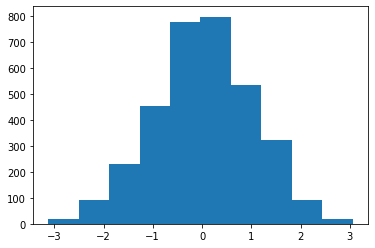

In [44]:
plt.hist(a)

In [60]:
check = (a < 0.75)
check

array([False,  True,  True, ...,  True,  True,  True])

In [56]:
traning = data[check]
testing = data[~check]

In [57]:
len(traning)

2518

In [58]:
len(testing)

815

## Con la libreria SKlearn

In [61]:
train, test = train_test_split(data, test_size = 0.2)

In [62]:
len(train)

2666

In [63]:
len(test)

667